## Support Vector Regressor

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Synthetic Data points
from sklearn.datasets import make_regression

In [3]:
X, y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3.0)

In [4]:
X

array([[ 0.36011093,  0.63964851],
       [ 0.79302145,  1.68295574],
       [ 0.43484287, -0.86616276],
       ...,
       [-2.36877754,  0.10776272],
       [-0.70471579, -0.51694363],
       [-0.94319474,  0.75854017]])

In [5]:
y

array([ 8.26690261e+00,  4.60020744e+01,  1.17530059e+01,  3.81479490e+01,
       -2.97228992e+01, -1.98095107e+01,  9.53509351e+00,  2.62457472e+01,
        3.27120379e+01,  2.47831402e+01, -8.35526594e+00,  2.65536613e+00,
        3.50191661e+01,  2.49461489e+01, -3.51066959e+01,  3.28298595e+01,
        1.59142504e+00, -2.46341765e+01, -1.40457977e+01,  1.83230385e+01,
       -2.51663246e+01, -7.62009919e+00, -1.56085018e+01,  2.80858724e+01,
        4.16987848e+00, -5.57297034e+01,  5.67149277e+01,  9.73145385e+00,
        2.83100800e+01, -6.75558059e+00, -4.91097813e+01,  6.36505418e+01,
       -4.05882797e+00, -3.21169529e+01,  3.12694298e+01, -2.19667229e+01,
       -1.33222054e+01, -1.64729087e+00, -6.72858911e+01,  4.45201558e+01,
       -1.83980358e+01,  2.45708617e+00,  4.62109027e+00,  4.84181488e+01,
        4.56281613e+01, -4.46197451e+01, -5.29908008e+01,  2.62446702e+01,
        5.40415106e+01, -4.59473457e+01, -8.15139174e+01,  2.95883056e+01,
        1.50950059e+01,  

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='0', ylabel='1'>

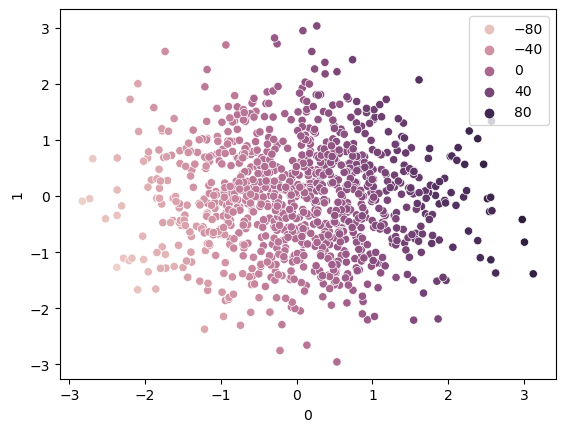

In [7]:
sns.scatterplot(x = pd.DataFrame(X)[0], y= pd.DataFrame(X)[1], hue = y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [9]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')

In [10]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [11]:
svr.coef_

array([[32.20761033,  7.96708338]])

In [15]:
y_pred = svr.predict(X_test)

In [16]:
from sklearn.metrics import r2_score
print(r2_score(y_pred, y_test))

0.9904699796057456


### Hyper Parameter Tuning

In [17]:
param_grid = {'C' : [0.1, 1, 10, 100, 1000],
              'gamma' : [1, 0.1, 0.001, 0.0001],
              'kernel' : ['linear'],
              'epsilon' : [0.1, 0.2, 0.3]
             }

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
grid = GridSearchCV(SVR(), param_grid = param_grid, refit = True, cv = 5, verbose = 3)

In [20]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.989 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.985 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.984 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.989 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.985 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.984 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [21]:
grid.best_params_

{'C': 1000, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [22]:
y_pred2 = grid.predict(X_test)

In [23]:
print(r2_score(y_pred2, y_test))

0.9906521705662463
